In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import kagglehub

path = kagglehub.dataset_download("victoriajabdulkadir/beverage-sales-prediction")

print("Path to dataset files:", path)

100%|██████████| 7.80k/7.80k [00:00<00:00, 16.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/victoriajabdulkadir/beverage-sales-prediction/versions/1


In [ ]:
import os

# List the files
print("Files in dataset directory:")
print(os.listdir(path))


Files in dataset directory:
['beverage_sales.csv']


In [ ]:
import pandas as pd
import os

csv_file = os.path.join(path, "beverage_sales.csv")

with open(csv_file, "r", encoding="cp1252", errors="replace") as f:
    df = pd.read_csv(f)

print(df.head())


   Temperature (°C)  Promotion  Beverage Sales
0                33          1      184.462555
1                19          1      123.129571
2                12          1       70.459383
3                25          1      135.463954
4                23          1      124.307494


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

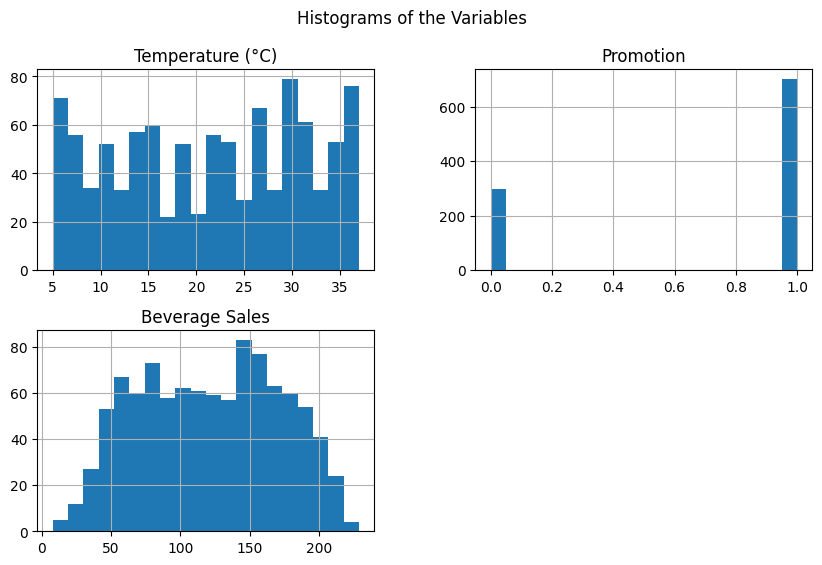

In [ ]:
# Plot histograms for each variable
df.hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of the Variables")
plt.show()

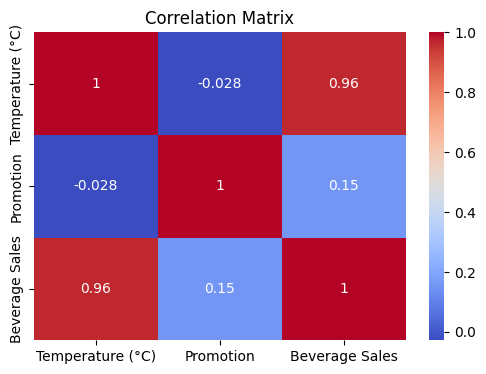

In [ ]:
# Plot correlation matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Create an interaction term between Temperature and Promotion
df['Temp_Promo'] = df['Temperature (°C)'] * df['Promotion']

# Define features (X) and target (y)
X = df[['Temperature (°C)', 'Promotion', 'Temp_Promo']]
y = df['Beverage Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Baseline Model: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R-squared:", r2_score(y_test, y_pred_lin))


Linear Regression Evaluation:
Mean Squared Error: 82.8518928437759
R-squared: 0.9670841785577932


In [ ]:
# Ridge Regression with Hyperparameter Tuning
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print("\nRidge Regression Evaluation:")
print("Best Ridge parameters:", grid_search.best_params_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R-squared:", r2_score(y_test, y_pred_ridge))



Ridge Regression Evaluation:
Best Ridge parameters: {'alpha': 0.1}
Mean Squared Error: 82.83523955560322
R-squared: 0.9670907946608308


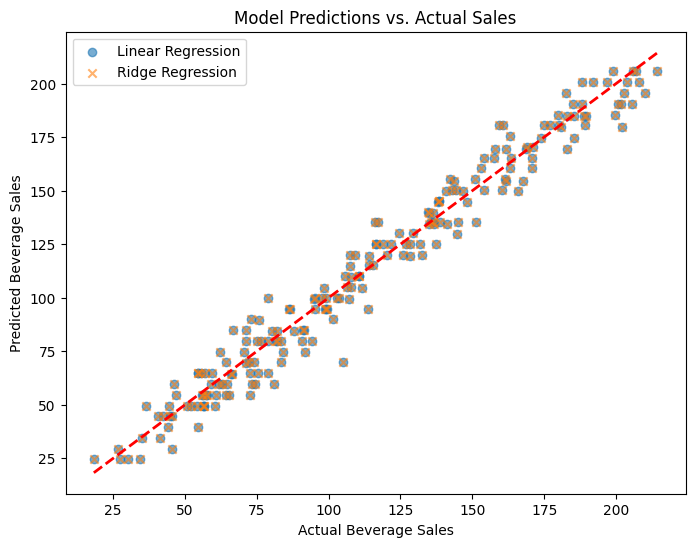

In [ ]:
# Visualize Model Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Ridge Regression', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Beverage Sales")
plt.ylabel("Predicted Beverage Sales")
plt.title("Model Predictions vs. Actual Sales")
plt.legend()
plt.show()